## First Notebook 

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("data/chocolate.csv") 

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50


In [5]:
df['Rating_class']=[1 if s>= 3.00 else 0 for s in df['Rating']]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   float64
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 184.7+ KB


In [6]:
df['Rating_class']==1

0        True
1        True
2        True
3        True
4        True
        ...  
2357    False
2358     True
2359     True
2360     True
2361     True
Name: Rating_class, Length: 2362, dtype: bool

In [7]:
df['Rating_class'].value_counts()

1    1815
0     547
Name: Rating_class, dtype: int64

In [47]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


In [9]:
df_copy.describe()

,REF,Review Date,Rating
count,2362.000000,2362.000000,2362.000000
mean,1343.279848,2013.894581,3.187384
std,709.468334,3.667615,0.450292
min,5.000000,2006.000000,1.000000
25%,754.000000,2011.000000,3.000000
50%,1377.000000,2014.000000,3.250000
75%,1948.000000,2017.000000,3.500000
max,2542.000000,2021.000000,4.000000


In [10]:
df_copy.corr()

,REF,Review Date,Rating
REF,1.000000,0.992096,0.092580
Review Date,0.992096,1.000000,0.095099
Rating,0.092580,0.095099,1.000000


In [147]:
char=Counter(" ".join(df["most_memorable_characteristics"]).split()).most_common(25)

In [148]:
df["Rating"].value_counts()

KeyError: 'Rating'

In [13]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Rating_class
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,1
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75,1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50,1
...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50,1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [64]:
df_dropped = df.drop(['Review Date', 'REF','memorable_characteristics_list'],axis=1)

KeyError: "['Review Date' 'REF'] not found in axis"

In [150]:
char

[('sweet,', 213),
 ('cocoa', 199),
 ('mild', 198),
 ('creamy,', 174),
 ('nutty,', 163),
 ('cocoa,', 157),
 ('sandy,', 154),
 ('fruit,', 140),
 ('sour', 127),
 ('fatty,', 123),
 ('roasty,', 117),
 ('intense,', 112),
 ('floral,', 108),
 ('earthy,', 105),
 ('spicy,', 103),
 ('rich', 97),
 ('nutty', 97),
 ('fruit', 96),
 ('off', 94),
 ('roasty', 93),
 ('earthy', 80),
 ('sweet', 74),
 ('sticky,', 71),
 ('vanilla,', 67),
 ('dried', 67)]

In [15]:
df_dropped

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Rating_class
0,5150,U.S.A.,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,1
1,5150,U.S.A.,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,1
2,5150,U.S.A.,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,1
3,A. Morin,France,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75,1
4,A. Morin,France,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50,1
...,...,...,...,...,...,...,...,...,...
2357,Zotter,Austria,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2358,Zotter,Austria,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,1
2359,Zotter,Austria,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50,1
2360,Zotter,Austria,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [16]:
df= df_copy.dropna()

In [138]:
char

[('sweet,', 213),
 ('cocoa', 199),
 ('mild', 198),
 ('creamy,', 174),
 ('nutty,', 163),
 ('cocoa,', 157),
 ('sandy,', 154),
 ('fruit,', 140),
 ('sour', 127),
 ('fatty,', 123),
 ('roasty,', 117),
 ('intense,', 112),
 ('floral,', 108),
 ('earthy,', 105),
 ('spicy,', 103),
 ('rich', 97),
 ('nutty', 97),
 ('fruit', 96),
 ('off', 94),
 ('roasty', 93),
 ('earthy', 80),
 ('sweet', 74),
 ('sticky,', 71),
 ('vanilla,', 67),
 ('dried', 67),
 ('dry,', 63),
 ('bitter', 61),
 ('woody,', 60),
 ('gritty,', 60),
 ('molasses,', 59),
 ('bitter,', 59),
 ('sour,', 58),
 ('tart,', 55),
 ('intense', 54),
 ('oily,', 50),
 ('coffee', 50),
 ('berry,', 50),
 ('red', 49),
 ('strong', 44),
 ('rich,', 44)]

In [127]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,memorable_characteristics_list,most_memorable_characteristics_ls
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,"[cocoa, blackberry, full body]","[cocoa, blackberry, full body]"
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,"[cocoa, vegetal, savory]","[cocoa, vegetal, savory]"
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,"[rich cocoa, fatty, bready]","[rich cocoa, fatty, bready]"
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,"[fruity, melon, roasty]","[fruity, melon, roasty]"
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,"[vegetal, nutty]","[vegetal, nutty]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,"[waxy, cloying, vegetal]","[waxy, cloying, vegetal]"
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,"[strong nutty, marshmallow]","[strong nutty, marshmallow]"
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50,"[muted, roasty, accessible]","[muted, roasty, accessible]"
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,"[fatty, mild nuts, mild fruit]","[fatty, mild nuts, mild fruit]"


1. Loop over `char`
2. Collect the name of the characteristic
3. Filter the dataframe for all rows where the characteristic is found
    * (You can use `df[df.column.contains(characteristic)]`
4. Calculate the average rating for the filtered dataframe
5. Store the average

In [139]:
Characters_ratings={}
for characteristic in char:
    c = characteristic[0]
    avg_rating = df[df['most_memorable_characteristics'].str.contains(c)]['rating'].mean()
    Characters_ratings[c] = avg_rating

In [140]:
Characters_ratings

{'sweet,': 3.0280269058295963,
 'cocoa': 3.369565217391304,
 'mild': 3.2620772946859904,
 'creamy,': 3.475988700564972,
 'nutty,': 3.289877300613497,
 'cocoa,': 3.3659638554216866,
 'sandy,': 3.091194968553459,
 'fruit,': 3.2585616438356166,
 'sour': 3.009259259259259,
 'fatty,': 3.0694444444444446,
 'roasty,': 3.1395833333333334,
 'intense,': 3.1826086956521737,
 'floral,': 3.2261261261261263,
 'earthy,': 3.053738317757009,
 'spicy,': 3.323809523809524,
 'rich': 3.465034965034965,
 'nutty': 3.289272030651341,
 'fruit': 3.296979865771812,
 'off': 2.954656862745098,
 'roasty': 3.197429906542056,
 'earthy': 3.036096256684492,
 'sweet': 3.047979797979798,
 'sticky,': 3.136986301369863,
 'vanilla,': 2.8308823529411766,
 'dried': 3.41044776119403,
 'dry,': 2.9642857142857144,
 'bitter': 2.764,
 'woody,': 3.129032258064516,
 'gritty,': 2.9365079365079363,
 'molasses,': 2.971774193548387,
 'bitter,': 2.8524590163934427,
 'sour,': 2.925,
 'tart,': 3.272727272727273,
 'intense': 3.1781609195402

In [141]:
top_words = list({k: v for k, v in sorted(Characters_ratings.items(), key=lambda item: item[1])}.keys())[-15:]
top_words

['fruit,',
 'mild',
 'tart,',
 'nutty',
 'nutty,',
 'fruit',
 'spicy,',
 'red',
 'cocoa,',
 'cocoa',
 'dried',
 'rich',
 'berry,',
 'creamy,',
 'rich,']

In [ ]:
top_word_present = []

# loop through memorable_characteristics_list in dataframe

# If any words from top_words is in that list, append 1 to top_word_present

# If not append 0

# Create new column with top_word_present

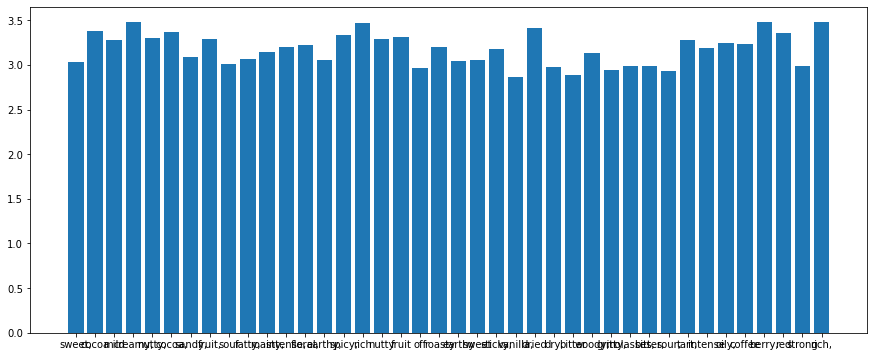

In [20]:
plt.figure(figsize=(15,6))
plt.bar(*zip(*Characters_ratings.items()))
plt.show()

In [21]:
df = df_copy.replace('%', ' ', regex=True)

In [22]:
df['Cocoa Percent'] = df['Cocoa Percent'].astype(float)

In [23]:
df_copy.drop(['Most Memorable Characteristics'], axis=1)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C",3.25


In [24]:
y = df['Rating']
X = df.drop('Rating', axis=1)

In [25]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2021)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2021)

In [27]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['REF', 'Review Date', 'Cocoa Percent']

In [28]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['Company (Manufacturer)',
 'Company Location',
 'Country of Bean Origin',
 'Specific Bean Origin or Bar Name',
 'Ingredients',
 'Most Memorable Characteristics']

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train[num_cols])

StandardScaler()

In [31]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [32]:
df['Ingredients'].value_counts()

3- B,S,C          903
2- B,S            661
4- B,S,C,L        273
5- B,S,C,V,L      184
4- B,S,C,V        139
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
5-B,S,C,V,Sa        6
4- B,S,V,L          5
1- B                5
4- B,S,C,Sa         5
6-B,S,C,V,L,Sa      4
3- B,S,V            3
4- B,S*,V,L         3
4- B,S*,C,L         2
2- B,C              1
5- B,S,C,L,Sa       1
3- B,S*,Sa          1
Name: Ingredients, dtype: int64

In [33]:
df['Ingredients'].value_counts().head(8)

3- B,S,C        903
2- B,S          661
4- B,S,C,L      273
5- B,S,C,V,L    184
4- B,S,C,V      139
2- B,S*          31
4- B,S*,C,Sa     20
3- B,S*,C        12
Name: Ingredients, dtype: int64

In [34]:
X_cat = df[['Most Memorable Characteristics','Ingredients']]

In [35]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['Company (Manufacturer)',
 'Company Location',
 'Country of Bean Origin',
 'Specific Bean Origin or Bar Name',
 'Ingredients',
 'Most Memorable Characteristics']

In [36]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [37]:
ohe.fit(X_train[cat_cols])

ValueError: Input contains NaN

In [ ]:
X_train_encoded = ohe.transform(X_train[[cat_cols]])
X_val_encoded = ohe.transform(X_val[[cat_cols]])

In [ ]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [ ]:
X_val_encoded_df

In [ ]:
df['Most Memorable Characteristics'].value_counts()

In [ ]:
c = df['Most Memorable Characteristics'].map(lambda x: x.split(','))

In [38]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [ ]:
df['Ingredients'].value_counts()

In [39]:
Most = np.unique(df['Most Memorable Characteristics'])
Most

array(['Easter candy, burnt', 'Fruity, Roasty',
       'XL nibs, sour, cardboard', ..., 'woody, toast, pepper',
       'yellow fruit', 'yogurt, lemon, licorice'], dtype=object)

In [157]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
  

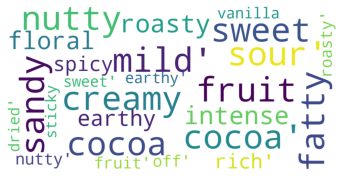

<Figure size 432x288 with 0 Axes>

In [161]:
    plt.savefig('WordCloud.png')
show_wordcloud(char,title = None)